# Importing libaries

In [1]:
import glob
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode()
from wordcloud import WordCloud, STOPWORDS
from functools import reduce
from PIL import Image

import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Defining functions to be used in this notebook

In [2]:
def convert_to_mins(string):
    if isinstance(string, float):
        return None
    a=string.split(' ')
    
    if len(a)==4:
        duration_in_min = int(a[0])*60 + int(a[2])
        
    elif (len(a)==2) and (a[1]=='m'):
        duration_in_min = int(a[0])
        
    elif (len(a)==2) and (a[1]=='h'):
        duration_in_min = int(a[0])*60
        
    elif (len(a)==1) and (a[0]=='Multi-day') :
        duration_in_min = 1500
        
    else:
        duration_in_min = None
        
    return duration_in_min

In [3]:
def convert_to_miles(string):
    if isinstance(string, float):
        return None
    
    a=string.split(' ')
    if (len(a)==2) and (a[1]=='mi'):
        distance = float(a[0])
    else:
        distance = None
    return distance

In [4]:
def number_of_tags(lst):
    return len(lst.split(','))

In [5]:
def number_of_words(string):
    return (len(string))

In [6]:
def difficulty(string):
    if string =='easy':
        return 1
    elif string == 'moderate':
        return 2
    elif string=='hard':
        return 3
    else:
        return -1

In [7]:
def is_there(string):
    if NaN:
        return 0
    else:
        return 1

In [8]:
def code_generator(name):
    return us_state_abbrev[name.replace('-', ' ').title()]

In [9]:
def gen_tag_list(string):
    return eval(string)

In [10]:
us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'American Samoa': 'AS',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Guam': 'GU',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Northern Mariana Islands':'MP',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Puerto Rico': 'PR',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virgin Islands': 'VI',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY'
}

# Merging two csv files fore each state

Trail information for each state is saved in 2 csv files. We will first combine the 2 csv files:

In [11]:
path1 ='/Users/eunheelim/Capstone1/data4/*.csv'
path2 = '/Users/eunheelim/Capstone1/data5/*.csv'

filelist1=sorted(glob.iglob(path1))
filelist2=sorted(glob.iglob(path2))

df = pd.DataFrame() 

for file in filelist1:
    state = file[33:-4]
    file2 =  '/Users/eunheelim/Capstone1/data5/' + state + '2.csv'
    
    df1 = pd.read_csv(file,
                  header=None,
                  names=['duration', 'distance'])

    df2 = df2 = pd.read_csv(file2,
                 index_col='Unnamed: 0')
    
    df0= df2.join(df1)
    df0['state'] = state
    
    df= df.append(df0)

# Data engineering on the data frame

In [12]:
df['difficulty_rating'] = df['difficulty'].apply(difficulty)
df['short'] = df['short_description'].apply(number_of_words)
df['long'] = np.where(df['long_description'].isna(), 0, 1)
df['n_tags'] = df['tag_list'].apply(number_of_tags)

df['distance_mi']= df['distance'].apply(convert_to_miles)
df['duration_min']= df['duration'].apply(convert_to_mins)
df["State"] = df['state'].apply(code_generator)

df= df.drop(columns={'distance', 'duration','best_rating','worst_rating','difficulty'})

# Changing column names
df= df.rename(columns={"average_rating": "stars", "difficulty_rating":"difficulty", "distance_mi":'distance',"duration_min":"duration"})

df = df[df['duration']<1500]
df = df[df['review_count']!=0]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35265 entries, 0 to 825
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               35265 non-null  object 
 1   stars              35265 non-null  float64
 2   review_count       35265 non-null  int64  
 3   location           35265 non-null  object 
 4   elevation          35265 non-null  float64
 5   route_type         35265 non-null  object 
 6   short_description  35265 non-null  object 
 7   long_description   17056 non-null  object 
 8   tag_list           35265 non-null  object 
 9   n_photos           35265 non-null  int64  
 10  n_recordings       35265 non-null  int64  
 11  n_completed        35265 non-null  int64  
 12  state              35265 non-null  object 
 13  difficulty         35265 non-null  int64  
 14  short              35265 non-null  int64  
 15  long               35265 non-null  int64  
 16  n_tags             35265

## Histogram of features

array([[<AxesSubplot:title={'center':'stars'}>,
        <AxesSubplot:title={'center':'review_count'}>,
        <AxesSubplot:title={'center':'elevation'}>],
       [<AxesSubplot:title={'center':'n_photos'}>,
        <AxesSubplot:title={'center':'n_recordings'}>,
        <AxesSubplot:title={'center':'n_completed'}>],
       [<AxesSubplot:title={'center':'difficulty'}>,
        <AxesSubplot:title={'center':'short'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'n_tags'}>,
        <AxesSubplot:title={'center':'distance'}>,
        <AxesSubplot:title={'center':'duration'}>]], dtype=object)

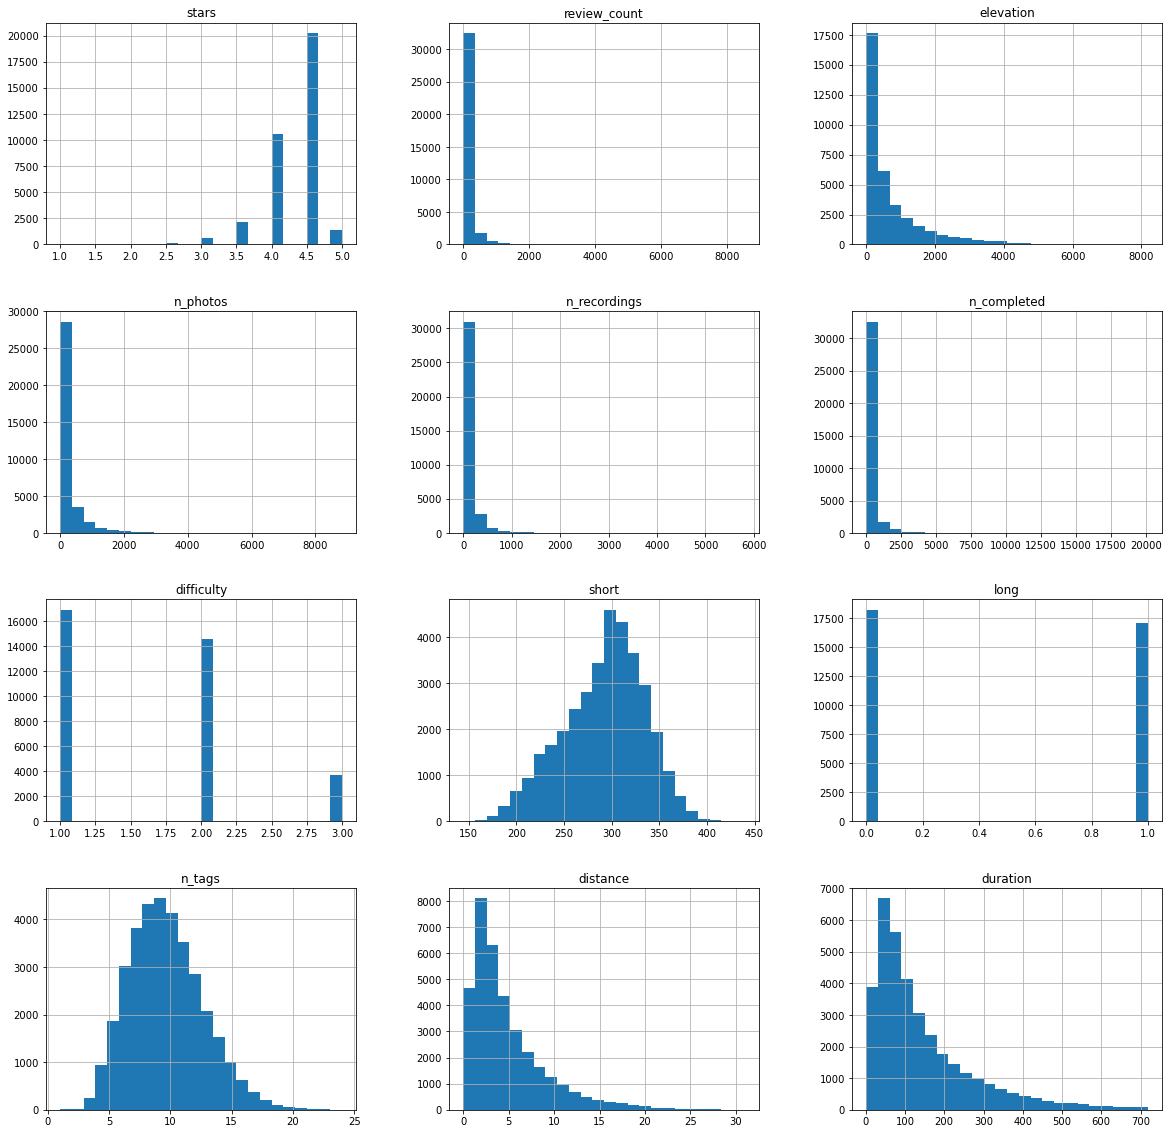

In [14]:
df.hist(bins=24, figsize=(20,20))

- Star rating is slightly left skewed and the mode is 4.5. 
- Review count, elevation, n_photos, n_recordings, and n_completed show exponential distirbution with a few observations at high number. 
- There are similar amount of observations with easy and medium difficulty, and about 1/3~1/4 number of observations with high difficulty.
- Number of words in short description has normal distritubtion around ~300 words
- About half of observations have long description, and half does not.
- Number of tages (n_tags) also has normal distribution with center around 10 tags.

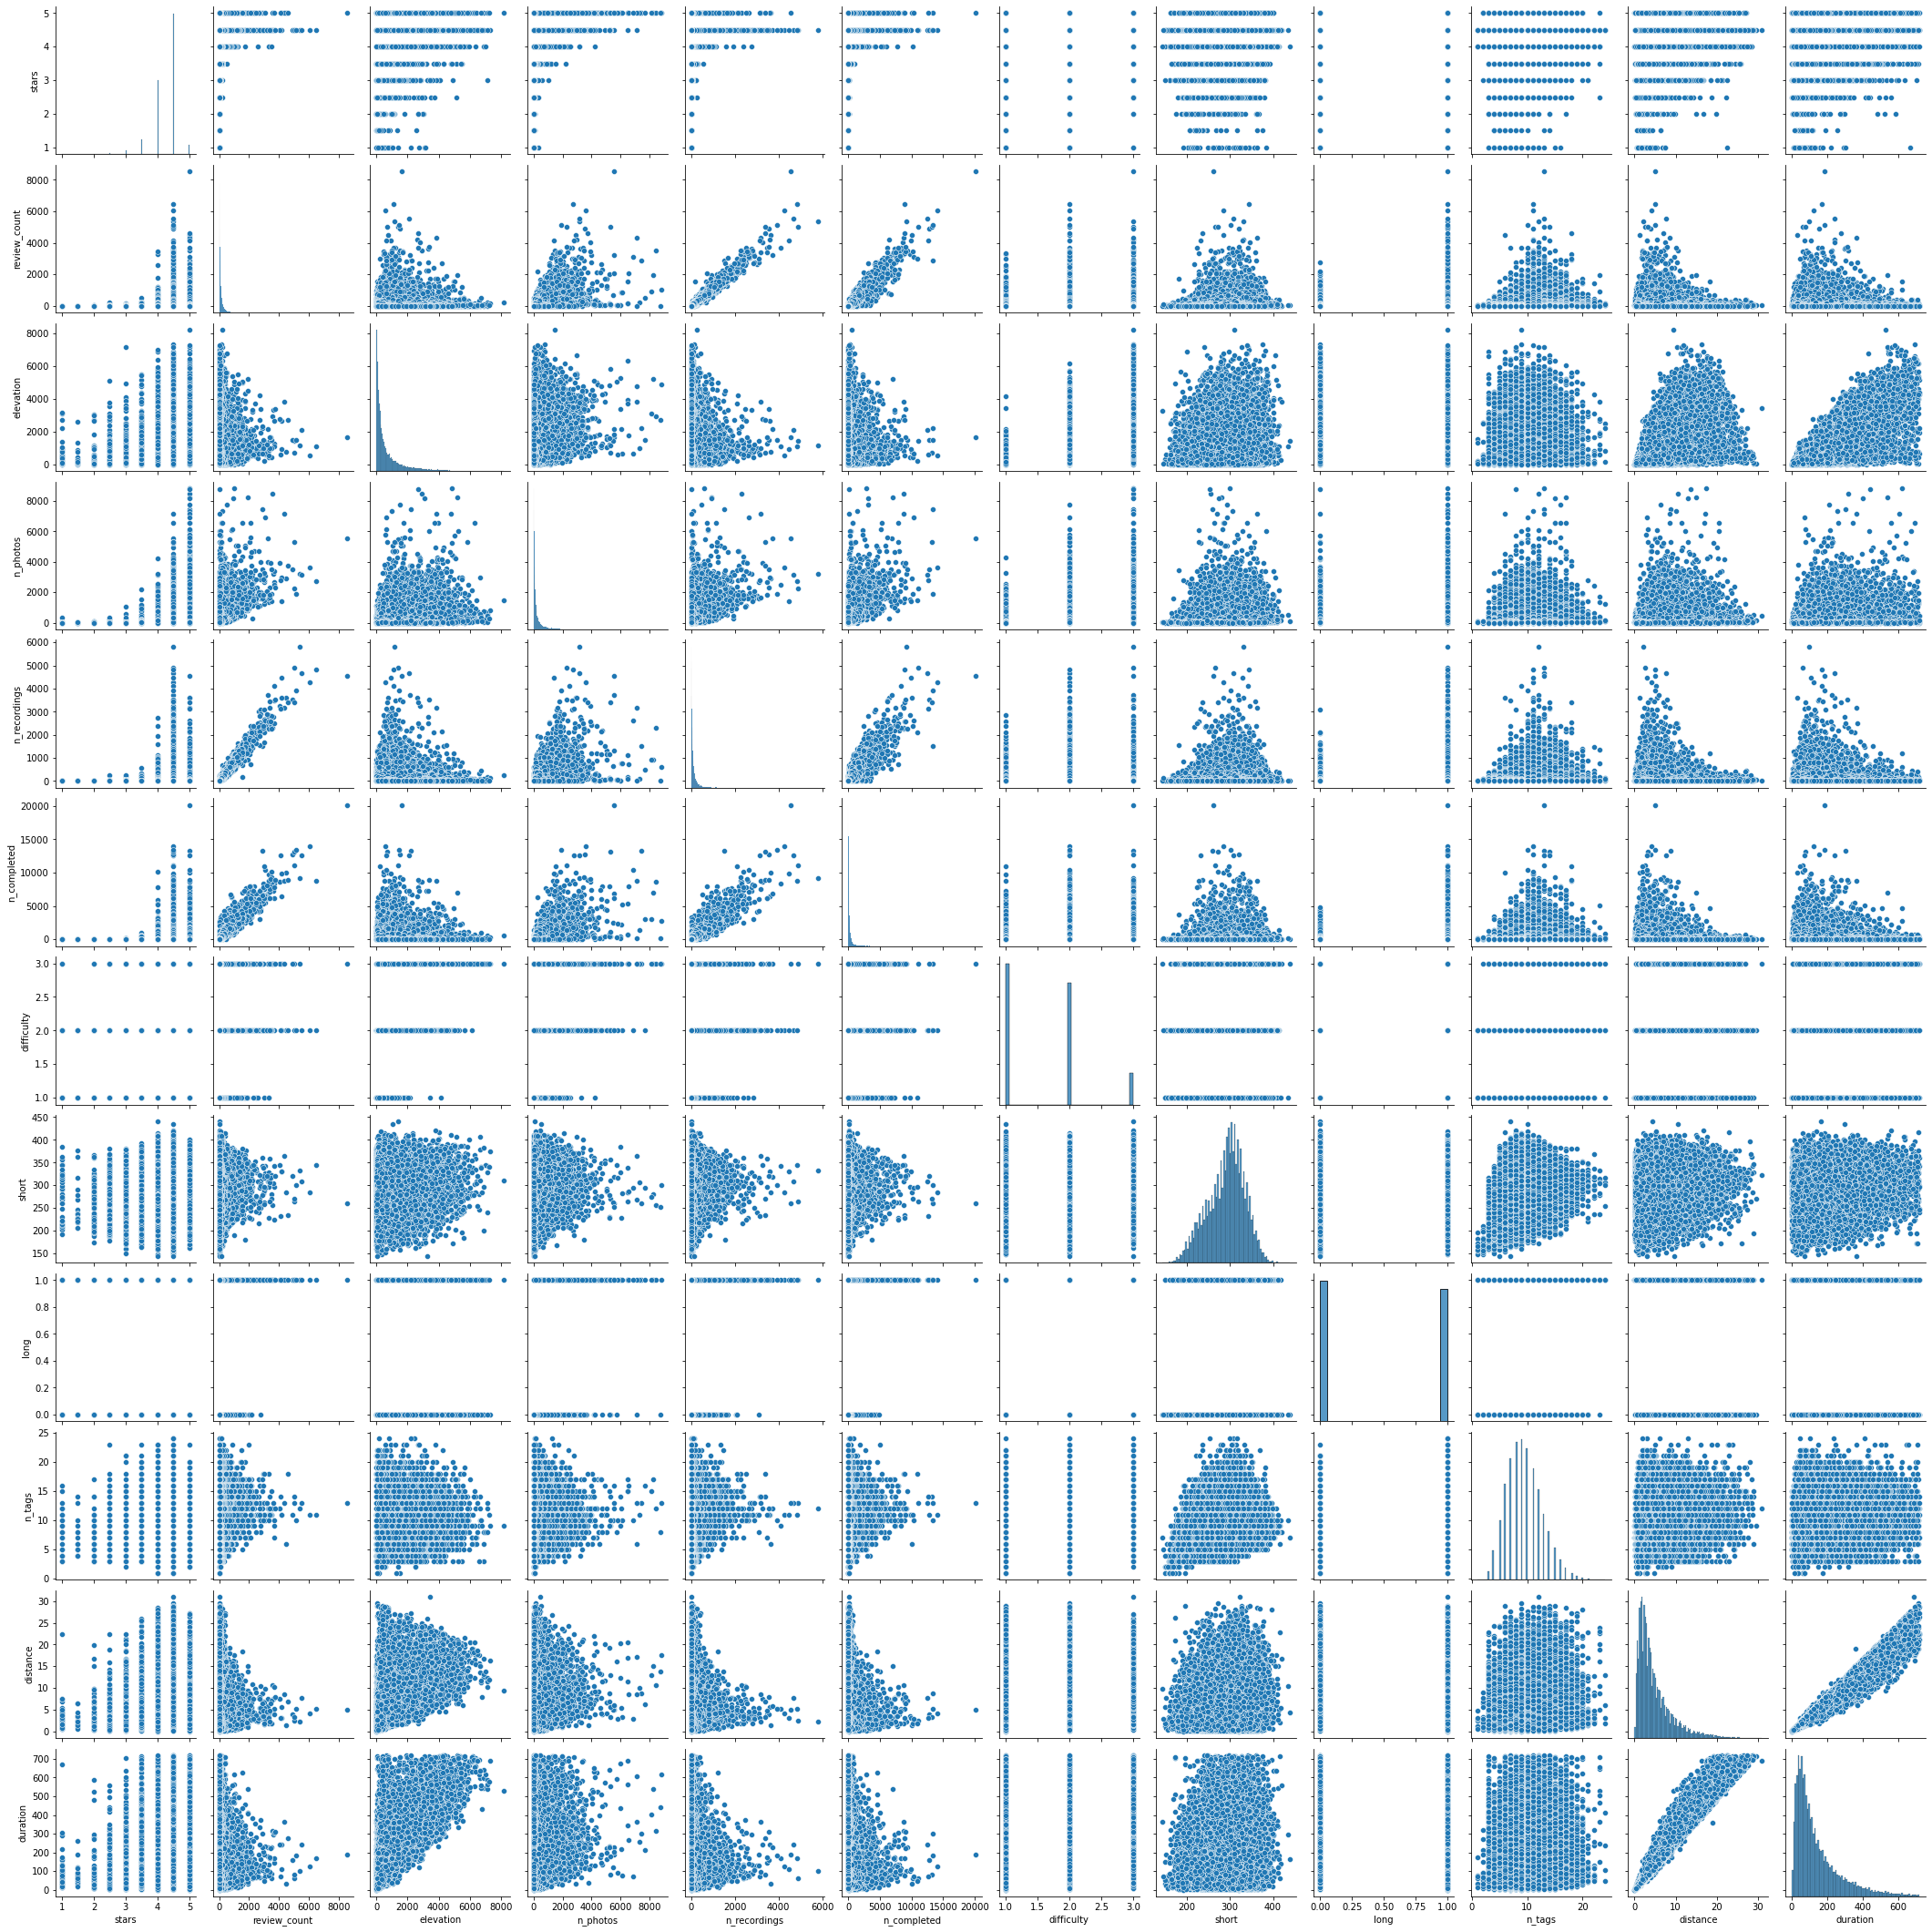

In [15]:
sns.pairplot(df)

# Visualizing star rating distribution

In [16]:
# Calculate % of each star rating for the entire dataset
a = df['stars'].value_counts().sort_index(ascending=False)
b= np.around(a/len(df['stars'])*100,2)
print(f'Star rating distribution [%]:\n{b}')

Star rating distribution [%]:
5.0     3.96
4.5    57.36
4.0    30.10
3.5     6.03
3.0     1.69
2.5     0.51
2.0     0.19
1.5     0.05
1.0     0.10
Name: stars, dtype: float64


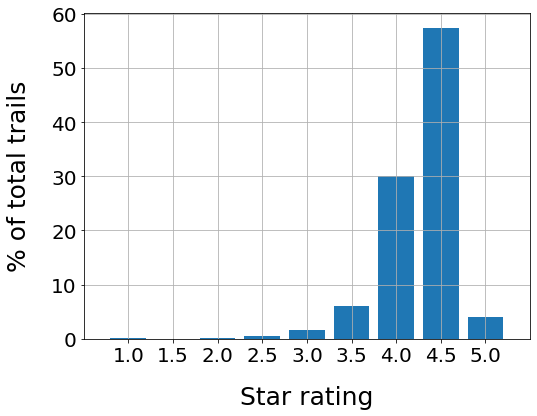

In [44]:
# Make a bar plot of star rating distribution for the entire dataset
arr = (df['stars'].to_numpy())
labels, counts = np.unique(arr, return_counts=True)
counts = counts/len(arr)*100

fig, ax = plt.subplots(figsize=(8, 6))

ax.set_ylabel('% of total trails', fontsize=25)
ax.set_xlabel('Star rating', fontsize=25)
ax.grid('off')
ax.set_xlim(0.5,5.5)
ax.tick_params(labelsize=20)
ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20
ax.bar(labels, counts, width=0.4, align='center')
plt.gca().set_xticks(labels)
plt.savefig('../images/star_rating_histogram.png')
plt.show()

In [18]:
easy = df[df['difficulty']==1]
moderate = df[df['difficulty']==2]
hard = df[df['difficulty']==3]

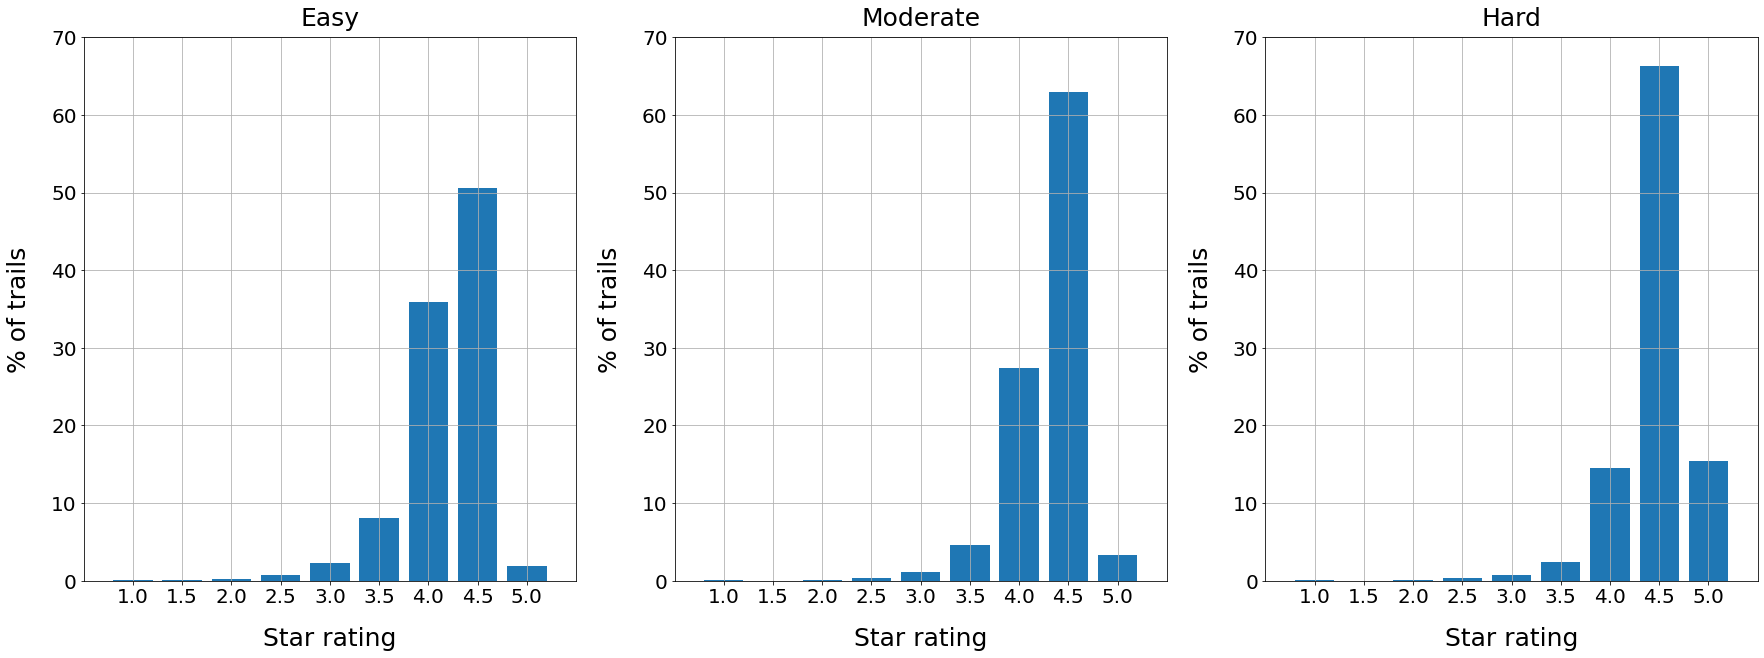

In [43]:
# Make a bar plot of star rating distribution for the entire dataset
fix, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(30,10), sharex='all')


arr1 = (easy['stars'].to_numpy())
labels1, counts1 = np.unique(arr1, return_counts=True)
counts1 = counts1/len(arr1)*100

arr2 = (moderate['stars'].to_numpy())
labels2, counts2 = np.unique(arr2, return_counts=True)
counts2 = counts2/len(arr2)*100

arr3 = (hard['stars'].to_numpy())
labels3, counts3 = np.unique(arr3, return_counts=True)
counts3 = counts3/len(arr3)*100

ax1.bar(labels1, counts1, width=0.4, align='center')
ax2.bar(labels2, counts2, width=0.4, align='center')
ax3.bar(labels3, counts3, width=0.4, align='center')

ax1.set_ylabel('% of trails', fontsize=25)
ax1.set_xlabel('Star rating', fontsize=25)
ax1.grid('off')
ax1.set_xlim(0.5,5.5)
ax1.set_ylim(0,70)
ax1.tick_params(labelsize=20)
ax1.yaxis.labelpad = 20
ax1.xaxis.labelpad = 20
ax1.set_title('Easy', fontsize=25, y=1.01)

ax2.set_ylabel('% of trails', fontsize=25)
ax2.set_xlabel('Star rating', fontsize=25)
ax2.grid('off')
ax2.set_xlim(0.5,5.5)
ax2.set_ylim(0,70)
ax2.tick_params(labelsize=20)
ax2.yaxis.labelpad = 20
ax2.xaxis.labelpad = 20
ax2.set_title('Moderate', fontsize=25, y=1.01)

ax3.set_ylabel('% of trails', fontsize=25)
ax3.set_xlabel('Star rating', fontsize=25)
ax3.grid('off')
ax3.set_xlim(0.5,5.5)
ax3.set_ylim(0,70)
ax3.tick_params(labelsize=20)
ax3.yaxis.labelpad = 20
ax3.xaxis.labelpad = 20
ax3.set_title('Hard', fontsize=25, y=1.01)

plt.gca().set_xticks(labels)
plt.tight_layout

plt.savefig('../images/star_rating_histogram_by_difficulty.png')
plt.show()



In [20]:
print('easy')
for item in (zip(labels1, counts1)):
    print(item)
    
print ('mod')
for item in (zip(labels2, counts2)):
    print(item)
    
print('hard')
for item in (zip(labels3, counts3)):
    print(item)

easy
(1.0, 0.12414282336249705)
(1.5, 0.0650271931898794)
(2.0, 0.2778434618113029)
(2.5, 0.6857413100023646)
(3.0, 2.3409789548356588)
(3.5, 8.057460392527785)
(4.0, 35.91865689288248)
(4.5, 50.59706786474344)
(5.0, 1.9330811066445968)
mod
(1.0, 0.07532182963571624)
(1.5, 0.03423719528896193)
(2.0, 0.13010134209805532)
(2.5, 0.3629142700629964)
(3.0, 1.1777595179402904)
(3.5, 4.608326485894276)
(4.0, 27.348671596822786)
(4.5, 62.89372774582306)
(5.0, 3.3689400164338537)
hard
(1.0, 0.0534045393858478)
(2.0, 0.0534045393858478)
(2.5, 0.32042723631508674)
(3.0, 0.7476635514018692)
(3.5, 2.456608811748999)
(4.0, 14.57943925233645)
(4.5, 66.35514018691589)
(5.0, 15.433911882510012)


In [21]:
easy['stars'].mean()

4.1874261054622846

In [22]:
moderate['stars'].mean()

4.302177485620378

In [23]:
hard['stars'].mean()

4.458878504672898

## Average star rating by states:

In [24]:
import plotly.io as pio; pio.renderers.default='notebook'

In [42]:
state_stars= df.groupby('State').mean()['stars'].reset_index()
fig = px.choropleth(state_stars, locations='State',locationmode="USA-states",title='Average Star Rating for Trails by State', color='stars', scope="usa", color_continuous_scale=px.colors.sequential.YlGn)
fig.write_image('../images/map_star.png')
fig.show()

In [41]:
state_difficulty= df.groupby('State').mean()['difficulty'].reset_index()
fig = px.choropleth(state_difficulty, locations='State',locationmode="USA-states",title='Average difficulty for Trails by State', 
                    color='difficulty', scope="usa", color_continuous_scale=px.colors.sequential.Brwnyl)
fig.write_image('../images/map_difficulty.png')
fig.show()

In [27]:
state_low_star= (df[df['stars']<4].groupby('State').size()).reset_index()
state_low_star.columns = ['State','count']
state_low_star.sort_values('count')

State  count
3     AZ      1
4     CA      1
25    NC      4
32    NY      4
45    WA      5
26    ND      7
42    UT     11
17    MA     14
27    NE     16
35    OR     17
36    PA     17
6     DE     19
39    SD     23
28    NH     23
41    TX     25
43    VA     26
37    RI     43
23    MS     44
14    KS     49
0     AK     50
16    LA     50
10    IA     53
33    OH     54
47    WV     56
40    TN     57
34    OK     61
30    NM     65
44    VT     69
48    WY     74
19    ME     76
1     AL     79
20    MI     82
11    ID     83
21    MN     84
5     CT     85
9     HI     86
31    NV     87
18    MD     89
7     FL     92
38    SC     95
13    IN     96
8     GA     96
24    MT    105
2     AR    106
46    WI    109
15    KY    122
12    IL    138
29    NJ    157
22    MO    218

In [28]:
grouped = df.groupby('State').size().reset_index()
grouped.columns = ['State','count']
grouped.sort_values('count', ascending=True)

State  count
27    ND     65
24    MS    113
7     DE    134
28    NE    136
17    LA    172
40    SD    176
38    RI    250
15    KS    263
35    OK    315
11    IA    377
48    WV    462
45    VT    503
10    HI    535
39    SC    544
0     AK    560
2     AR    570
1     AL    580
16    KY    595
49    WY    662
22    MN    668
14    IN    672
32    NV    677
47    WI    701
12    ID    799
25    MT    847
13    IL    875
23    MO    891
19    MD    902
8     FL    935
31    NM    938
43    UT    946
9     GA    948
21    MI    952
41    TN    955
3     AZ    957
37    PA    958
44    VA    958
46    WA    964
36    OR    966
42    TX    966
26    NC    968
34    OH    971
29    NH    972
5     CO    973
30    NJ    977
20    ME    977
33    NY    980
6     CT    984
4     CA    985
18    MA    991

In [29]:
result = pd.merge(state_low_star, grouped, on='State', how='inner', suffixes=('_low_star', '_total'))

In [30]:
result['percent_low_star'] = result['count_low_star']/result['count_total']*100

In [31]:
result

State  count_low_star  count_total  percent_low_star
0     AK              50          560          8.928571
1     AL              79          580         13.620690
2     AR             106          570         18.596491
3     AZ               1          957          0.104493
4     CA               1          985          0.101523
5     CT              85          984          8.638211
6     DE              19          134         14.179104
7     FL              92          935          9.839572
8     GA              96          948         10.126582
9     HI              86          535         16.074766
10    IA              53          377         14.058355
11    ID              83          799         10.387985
12    IL             138          875         15.771429
13    IN              96          672         14.285714
14    KS              49          263         18.631179
15    KY             122          595         20.504202
16    LA              50          172         29.069767
17    MA              14          991          1.412714
18    MD              89          902          9.866962
19    ME              76          977          7.778915
20    MI              82          952          8.613445
21    MN              84          668         12.574850
22    MO             218          891         24.466891
23    MS              44          113         38.938053
24    MT             105          847         12.396694
25    NC               4          968          0.413223
26    ND               7           65         10.769231
27    NE              16          136         11.764706
28    NH              23          972          2.366255
29    NJ             157          977         16.069601
30    NM              65          938          6.929638
31    NV              87          677         12.850812
32    NY               4          980          0.408163
33    OH              54          971          5.561277
34    OK              61          315         19.365079
35    OR              17          966          1.759834
36    PA              17          958          1.774530
37    RI              43          250         17.200000
38    SC              95          544         17.463235
39    SD              23          176         13.068182
40    TN              57          955          5.968586
41    TX              25          966          2.587992
42    UT              11          946          1.162791
43    VA              26          958          2.713987
44    VT              69          503         13.717694
45    WA               5          964          0.518672
46    WI             109          701         15.549215
47    WV              56          462         12.121212
48    WY              74          662         11.178248

In [32]:
df[df['State']=='CA'].min()

name                                          Deer Creek Tribute Trail
stars                                                              3.5
review_count                                                        74
location                                   Abalone Cove Shoreline Park
elevation                                                            6
route_type                                                        Loop
short_description     Deer Creek Tribute Trail is a 7.8 mile modera...
tag_list             ['Backpacking', 'Camping', 'Fishing', 'Hiking'...
n_photos                                                            36
n_recordings                                                        44
n_completed                                                        178
state                                                       california
difficulty                                                           1
short                                                              191
long  

In [33]:
fig = px.choropleth(result, locations='State',locationmode="USA-states",title='Percentage of Trails with Star rating 3.5 or less', 
                    color='percent_low_star', scope="usa", color_continuous_scale=px.colors.sequential.Blues)

fig.write_image('../images/map_low_star.png')
fig.show()

In [34]:
a = [1,2,3]
b = [easy['stars'].mean(), moderate['stars'].mean(),hard['stars'].mean()]

In [35]:
df[df['stars']>=4].count()

name                 32242
stars                32242
review_count         32242
location             32242
elevation            32242
route_type           32242
short_description    32242
long_description     15720
tag_list             32242
n_photos             32242
n_recordings         32242
n_completed          32242
state                32242
difficulty           32242
short                32242
long                 32242
n_tags               32242
distance             32242
duration             32242
State                32242
dtype: int64

<AxesSubplot:xlabel='stars', ylabel='review_count'>

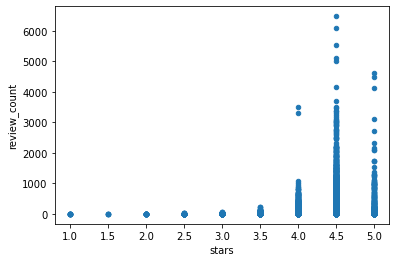

In [36]:
df[df['difficulty']==2].plot.scatter(x='stars',y='review_count')# c='average_rating', colormap='viridis')

<AxesSubplot:xlabel='stars', ylabel='review_count'>

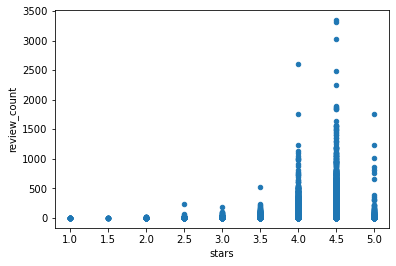

In [37]:
df[df['difficulty']==1].plot.scatter(x='stars',y='review_count')# c='average_rating', colormap='viridis')

<AxesSubplot:xlabel='stars', ylabel='review_count'>

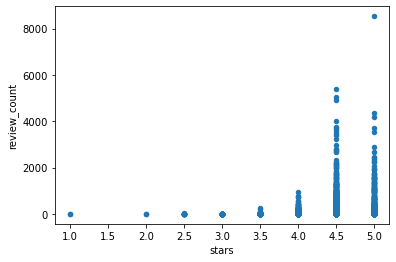

In [38]:
df[df['difficulty']==3].plot.scatter(x='stars',y='review_count')# c='average_rating', colormap='viridis')

In [39]:
easy.head()

name  stars  review_count  \
2                Sougahoagdee Falls    4.5           372   
7               Little River Canyon    4.5           260   
16  Overlook Trail via Quarry Trail    4.5           246   
26                Pulpit Rock Trail    4.5           177   
28               South Plateau Loop    4.5           283   

                                 location  elevation  route_type  \
2      William B Bankhead National Forest      436.0  Out & Back   
7   Little River Canyon National Preserve      190.0        Loop   
16       Ruffner Mountain Nature Preserve      383.0  Out & Back   
26                      Cheaha State Park      118.0  Out & Back   
28                  Monte Sano State Park      160.0        Loop   

                                    short_description  \
2   Sougahoagdee Falls is a 4 mile heavily traffic...   
7   Little River Canyon is a 1.4 mile heavily traf...   
16  Overlook Trail via Quarry Trail is a 2.8 mile ...   
26  Pulpit Rock Trail is a 0.6 mile moderately tra...   
28  South Plateau Loop is a 3.3 mile loop trail lo...   

                                     long_description  \
2                                                 NaN   
7                                                 NaN   
16  Due to COVID-19 the following changes have bee...   
26  Although generally easy, this trail does have ...   
28                                                NaN   

                                             tag_list  n_photos  n_recordings  \
2   ['Dogs on leash', 'Kid friendly', 'Hiking', 'N...       395           255   
7   ['Dogs on leash', 'Kid friendly', 'Hiking', 'M...       292           202   
16  ['Dogs on leash', 'Hiking', 'Nature trips', 'C...       327           272   
26  ['Dogs on leash', 'Kid friendly', 'Hiking', 'N...       196           144   
28  ['Dogs on leash', 'Kid friendly', 'Hiking', 'M...       299           293   

    n_completed    state  difficulty  short  long  n_tags  distance  duration  \
2           506  alabama           1    279     0      10       4.0     102.0   
7           582  alabama           1    267     0      12       1.4      33.0   
16          558  alabama           1    337     1       9       2.8      83.0   
26          384  alabama           1    322     1       8       0.6      15.0   
28          540  alabama           1    221     0       6       3.3      86.0   

   State  
2     AL  
7     AL  
16    AL  
26    AL  
28    AL

AttributeError: 'Rectangle' object has no property 'stat'

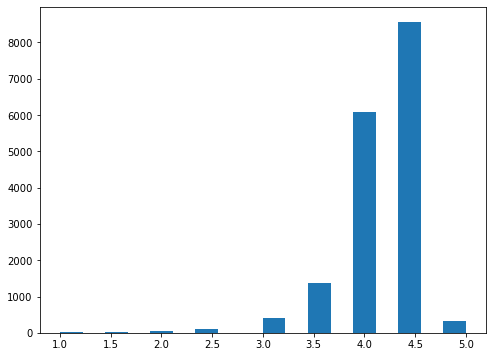

In [40]:
plt.figure(figsize=(8,6))

ax=easy['stars'].plot.hist(bins=18, stat='density')
ax=medium['stars'].plot.hist(bins=18)
ax=hard['stars'].plot.hist(bins=12)
#ax.set_xlim(2,5.5)

#plt.hist(medium['stars'], bins=100, alpha=0.5, label="medium")
#plt.hist(hard['stars'], bins=100, alpha=0.5, label="hard")

ax.set_xlabel("Stars", size=20)
ax.set_ylabel("Count", size=20)
ax.set_title("Multiple Histograms with Matplotlib")
#plt.legend(loc='upper right')

In [ ]:
plt.figure(figsize=(10,5))
ax= sns.distplot(bins=10,x='stars',shrink=.8, data=df)

ax.set_title('Star Rating vs Difficulty', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Star Rating', fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xlim(1.1,5.9)

In [ ]:
plt.figure(figsize=(10,5))
ax= sns.histplot(bins=10,hue='difficulty',x='stars',multiple="dodge",shrink=.8, data=df)

ax.set_title('Star Rating vs Difficulty', fontsize=20)
ax.set_ylabel('Count', fontsize=20)
ax.set_xlabel('Star Rating', fontsize=20)
ax.tick_params(labelsize=15)
ax.set_xlim(1.1,5.9)

In [ ]:
plt.figure(figsize=(12,8))
ax= sns.violinplot(y='difficulty',x='stars', data=df[df['stars']>3], 
                   bw=0.3, scale='area', palette='rocket_r', 
                   orient='h', linewidth=3)

#ax.set_title('Distribution of star rating for difficulty levels\n for trails with 3 or higher rating', fontsize=25)
ax.set_xlabel('Star Rating', fontsize=35)
ax.set_ylabel('Difficulty', fontsize=35)
ax.tick_params(labelsize=30)
ax.set_xlim(3.1,5.4)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.title('Distribution of star rating for difficulty levels\n for trails with 3+ stars', y=1.05, fontsize=35)

plt.show()

In [ ]:
plt.figure(figsize=(12,8))
ax= sns.violinplot(y='route_type',x='stars', data=df[df['stars']>3], 
                   bw=0.3, scale='area', palette='Paired', 
                   orient='h', linewidth=3)

#ax.set_title('Distribution of star rating for difficulty levels\n for trails with 3 or higher rating', fontsize=25)
ax.set_xlabel('Star Rating', fontsize=35)
ax.set_ylabel('Route type', fontsize=35)
ax.tick_params(labelsize=25)
ax.set_xlim(3.1,5.4)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.title('Distribution of star rating for route types\n for trails with 3+ stars', y=1.05, fontsize=35)

plt.show()

Trail star rating by distance

In [ ]:
df['elevation'].describe()

In [ ]:
conditions = [
    (df['elevation'] <= 141),
    (df['elevation'] > 141) & (df['elevation'] <= 380),
    (df['elevation'] > 380) & (df['elevation'] <= 984),
    (df['elevation'] > 984)
    ]

In [ ]:
df[df['elevation'] <= 141]['stars'].mean()

In [ ]:
df[(df['elevation'] > 141 )& (df['elevation'] <= 380)]['stars'].mean()

In [ ]:
df[(df['elevation'] > 380 )& (df['elevation'] <= 984)]['stars'].mean()

In [ ]:
df[df['elevation'] > 984]['stars'].mean()

In [ ]:
# create a list of our conditions
conditions = [
    (df['elevation'] <= 141),
    (df['elevation'] > 141) & (df['elevation'] <= 380),
    (df['elevation'] > 380) & (df['elevation'] <= 984),
    (df['elevation'] > 984)
    ]

# create a list of the values we want to assign for each condition
values = ['<141', '141-380', '380-984', '>984']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()


plt.figure(figsize=(10,12))
ax= sns.violinplot(y='tier',x='stars', data=df[df['stars']>3], 
                   bw=0.3, scale='area', palette='Paired', 
                   orient='h', linewidth=3)

#ax.set_title('Distribution of star rating for difficulty levels\n for trails with 3 or higher rating', fontsize=25)
ax.set_xlabel('Star Rating', fontsize=35)
ax.set_ylabel('Elevation [ft]', fontsize=35)
ax.tick_params(labelsize=25)
ax.set_xlim(3.1,5.4)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.title('Distribution of star rating for elevation\n for trails with 3+ stars', y=1.03, fontsize=35)

plt.show()

In [ ]:
df['distance'].describe()

In [ ]:
# create a list of our conditions
conditions = [
    (df['distance'] <= 2.1),
    (df['distance'] > 2.1) & (df['distance'] <= 3.7),
    (df['distance'] > 3.7) & (df['distance'] <= 6.5),
    (df['distance'] > 6.5)
    ]

# create a list of the values we want to assign for each condition
values = ['<2.1', '2.1-3.7', '3.7-6.5', '>6.5']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()

plt.figure(figsize=(10,12))
ax= sns.violinplot(y='tier',x='stars', data=df[df['stars']>3], 
                   bw=0.3, scale='area', palette='Paired', 
                   orient='h', linewidth=3)

#ax.set_title('Distribution of star rating for difficulty levels\n for trails with 3 or higher rating', fontsize=25)
ax.set_xlabel('Star Rating', fontsize=35)
ax.set_ylabel('Distance [mi]', fontsize=35)
ax.tick_params(labelsize=25)
ax.set_xlim(3.1,5.4)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.title('Distribution of star rating for distance\n for trails with 3+ stars', y=1.01, fontsize=35)

plt.show()

In [ ]:
df['duration'].describe()

In [ ]:
# create a list of our conditions
conditions = [
    (df['duration'] <= 58),
    (df['duration'] > 58) & (df['duration'] <= 107),
    (df['duration'] > 107) & (df['duration'] <= 196),
    (df['duration'] > 196)
    ]

# create a list of the values we want to assign for each condition
values = ['<58', '58-107', '107-196', '>196']

# create a new column and use np.select to assign values to it using our lists as arguments
df['tier'] = np.select(conditions, values)

# display updated DataFrame
df.head()


plt.figure(figsize=(10,12))
ax= sns.violinplot(y='tier',x='stars', data=df[df['stars']>3], 
                   bw=0.3, scale='area', palette='Paired', 
                   orient='h', linewidth=3)

#ax.set_title('Distribution of star rating for difficulty levels\n for trails with 3 or higher rating', fontsize=25)
ax.set_xlabel('Star Rating', fontsize=35)
ax.set_ylabel('Duration [min]', fontsize=35)
ax.tick_params(labelsize=25)
ax.set_xlim(3.1,5.4)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.title('Distribution of star rating for duration\n for trails with 3+ stars', y=1.01, fontsize=35)

plt.show()

In [ ]:
plt.figure(figsize=(20,25))
ax= sns.violinplot(y='stars',x='long', split=True, data=df, bw=0.3, scale='area', palette='Paired', orient='v', linewidth=5)

#ax.set_title('Distribution of star rating for difficulty levels\n for trails with 3 or higher rating', fontsize=25)
ax.set_xlabel('# of words', fontsize=40)
ax.set_ylabel('Star Rating', fontsize=40)
ax.tick_params(labelsize=40)

ax.yaxis.labelpad = 20
ax.xaxis.labelpad = 20

plt.title('Long description vs star rating', y=1.02, fontsize=50)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))

ax=sns.boxplot(y="review_count", x="stars", data=df)
ax.set_yscale('log')
ax.set_title('Number of reviews vs Star rating', fontsize=20)
ax.set_ylabel('Number of Reviews', fontsize=20)
ax.set_xlabel('Star Rating', fontsize=20)
ax.tick_params(labelsize=15)

In [ ]:
medians = df.groupby(['stars'])['review_count'].median()
means = df.groupby(['stars'])['review_count'].mean().round()

# Histogram showing number of stars with difficulty

In [ ]:
sns.catplot(
    data=df,
    x='difficulty',
    y='review_count',
    hue='stars',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3) # height should be three times width

In [ ]:
sns.catplot(
    data=df,
    x='stars',
    y='review_count',
    hue='difficulty',
    kind='box',
    height=5, # make the plot 5 units high
    aspect=3) # height should be three times width

In [ ]:
sns.scatterplot(
    data=df,
    x='stars',
    y='review_count',
    hue='difficulty') # height should be three times width

In [ ]:
plt.figure(figsize=(10,5))

ax=sns.kdeplot(
   data=df, x="short", hue="difficulty", common_norm=False)

ax.set_title('Description word count by trail difficulty level', fontsize=20)
ax.set_xlabel('word count', fontsize=20)
ax.set_ylabel('Normalized density', fontsize=20)
ax.tick_params(labelsize=15)

In [ ]:
sns.histplot(
   data=df[df['stars']>3], x="short", hue="difficulty",bins=20)

In [ ]:
plt.figure(figsize=(10,5))

ax=sns.kdeplot(
   data=df, x="short", hue="stars", common_norm=False, palette="crest")

ax.set_title('Description word count by trail stars', fontsize=20)
ax.set_xlabel('word count', fontsize=20)
ax.set_ylabel('Normalized density', fontsize=20)
ax.tick_params(labelsize=15)

# Distance vs star

In [ ]:
ax = sns.scatterplot(data=df, x='stars', y='distance')

In [ ]:
ax = sns.scatterplot(data=df, x='distance', y='stars')

In [ ]:
ax = sns.stripplot(data=df, y='distance', x='stars')

In [ ]:
ax = sns.scatterplot(data=df, x='elevation', y='stars')

In [ ]:
ax = sns.stripplot(data=df, y='elevation', x='stars')

In [ ]:
ax = sns.scatterplot(data=df, x='duration', y='stars')

In [ ]:
ax = sns.stripplot(data=df, y='duration', x='stars')

In [ ]:
ax = sns.stripplot(data=df, y='n_tags', x='stars')

In [ ]:
ax = sns.stripplot(data=df, y='n_photos', x='stars')

In [ ]:
ax = sns.stripplot(data=df, y='review_count', x='stars')

In [ ]:
ax = sns.stripplot(data=df, y='n_completed', x='stars')